This notebook is meant to hold code that will be used to demonstrate some basic features of the Pingouin statistics package.
This first cell will install Pinguoin, and import various packages for demonstration purchases.
Overall code based on https://github.com/erykml/medium_articles/blob/master/Statistics/pingouin.ipynb, a Jupyter file by Eryk Lewinson

In [8]:
! pip install pingouin

  Created wheel for pingouin: filename=pingouin-0.3.10-py3-none-any.whl size=203403 sha256=0258e34521003165bdbf2ee203557bbd4f6d841254e8a099eed564eaac721bb0
  Stored in directory: c:\users\christopher wang\appdata\local\pip\cache\wheels\26\7e\4b\d7815d18674094caa0d58cc40bb6a595b4a2e67ada30e2d42d
  Created wheel for outdated: filename=outdated-0.2.0-py3-none-any.whl size=4964 sha256=dc19d04cadc524326709411f90963956d68b7101bf7c7adc08208b9282b37acc
  Stored in directory: c:\users\christopher wang\appdata\local\pip\cache\wheels\2d\4f\c9\062da6e68841f60d0c3434980775671daaa07a574110567de6
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7054 sha256=1bb230ff56164c4a84f80b401bae8a0c0e3e550e3e21c86b4cede4d16ee6ada8
  Stored in directory: c:\users\christopher wang\appdata\local\pip\cache\wheels\6a\33\c4\0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin outdated littleutils


In [9]:
import pingouin as pg
import numpy as np
import pandas as pd 
import seaborn as sns

from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols

First, let us compare the results of a statistical t test between Pingouin and Scipy.stats. We'll set a random seed, and get two samples from normal distributions using numpy.random. Then, we'll test for a difference in populations with both Scipy.stats and Pingouin. They should result in the same conclusion, but will display different information.

In [12]:
np.random.seed(123)

x = np.random.normal(loc = 3, scale = 3, size = 100)
y = np.random.normal(loc = 0, scale = 1, size = 100)

ttest_ind(x,y)

Ttest_indResult(statistic=8.762657505076822, pvalue=8.59335758623527e-16)

In [11]:
pg.ttest(x,y)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,8.762658,198,two-sided,8.593358e-16,"[2.4, 3.8]",1.239227,5.81e+12,1.0


As you can see, both tests result in the same, extremely small p-value. However, while Scipy just gives a t-stat and p-value, the Pingouin test also gives us our degrees of freedom, the type of test, a confidence interval at 95%, and various other statistical information, all in a still-easy to read format. 

There are a few other things I also want to demonstrate with Pingouin. First, is the ease with which one can plot a QQplot. We'll take our sample from the previous cells and plot a QQplot to see how closely it aligns with a perfectly normal distribution.

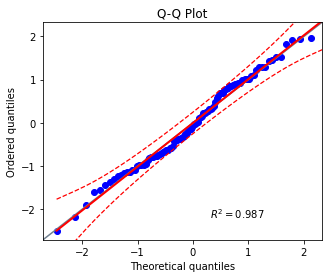

In [13]:
ax = pg.qqplot(x, dist="norm")

Just one line of code! And it comes with a good amount of auto-generated features as well. It gets auto labeled, and a regression is run on the sample against the "perfect" normal distribution. The $R^2$ coefficient is also generated, which gives us an idea of how close our sample is to the normal distribution. (The value here is very high, as is expected, since we're comparing a fairly large sample to the population it was pulled from).

As a final showcase, let's create linear models using a dataset on Boston housing. We'll use Pingouin and statsmodels to compare the processes.

In [16]:
from sklearn.datasets import load_boston
x, y = load_boston(return_X_y=True)

In [17]:
lm = pg.linear_regression(X, y)
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,36.459488,5.103459,7.144074,3.283439e-12,0.740643,0.73379,26.432226,46.486751
1,x1,-0.108011,0.032865,-3.286517,1.086810e-03,0.740643,0.73379,-0.172584,-0.043438
2,x2,0.046420,0.013727,3.381576,7.781097e-04,0.740643,0.73379,0.019449,0.073392
3,x3,0.020559,0.061496,0.334310,7.382881e-01,0.740643,0.73379,-0.100268,0.141385
4,x4,2.686734,0.861580,3.118381,1.925030e-03,0.740643,0.73379,0.993904,4.379563
5,x5,-17.766611,3.819744,-4.651257,4.245644e-06,0.740643,0.73379,-25.271634,-10.261589
6,x6,3.809865,0.417925,9.116140,1.979441e-18,0.740643,0.73379,2.988727,4.631004
7,x7,0.000692,0.013210,0.052402,9.582293e-01,0.740643,0.73379,-0.025262,0.026647
8,x8,-1.475567,0.199455,-7.398004,6.013491e-13,0.740643,0.73379,-1.867455,-1.083679
9,x9,0.306049,0.066346,4.612900,5.070529e-06,0.740643,0.73379,0.175692,0.436407


In [18]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        16:56:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this instance, Pinguoin is much simpler and easier to use, and instantly results in full models. Statsmodels, on the other hand, requires a few more steps to produce a full model, but does result in more information. For in-depth statistical work, the statsmodels method may be preferable, but in day-to-day data science work, when time and ease of use may be more important, the Pingouin method is probably better. 